## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(merged_mouse['Mouse ID'].value_counts())
total_mice_df = pd.DataFrame({'Total Number of Mice': total_mice}, index=[0])
total_mice_df

,Total Number of Mice
0,249


In [3]:
clean_mice = merged_mouse.drop_duplicates(subset=['Mouse ID'], keep='last', ignore_index= True)
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [4]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = len(clean_mice['Mouse ID'].value_counts())
total_clean_mice_df = pd.DataFrame({'Total Number of Clean Mice': total_clean_mice}, index=[0])
total_clean_mice_df


,Total Number of Clean Mice
0,249


## Summary Statistics

In [5]:
clean_mice['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg = clean_mice.groupby('Drug Regimen')
drug_sum = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
drug_mean = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().round(3)
drug_median = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().round(3)
drug_var = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().round(3)
drug_std = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().round(3) 
drug_sem = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().round(3)
# Assemble the resulting series into a single summary dataframe.
drug_summary = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Varience': drug_var, 'STD': drug_std, 'SEM': drug_sem})
drug_summary

,Mean,Median,Varience,STD,SEM
Drug Regimen,,,,,
Capomulin,36.668,38.125,32.663,5.715,1.143
Ceftamin,57.754,59.852,69.983,8.366,1.673
Infubinol,58.178,60.165,74.011,8.603,1.721
Ketapril,62.806,64.488,98.921,9.946,1.989
Naftisol,61.206,63.283,106.030,10.297,2.059
Placebo,60.508,62.031,78.760,8.875,1.775
Propriva,56.737,55.841,69.349,8.328,1.666
Ramicane,36.191,36.562,32.166,5.672,1.134
Stelasyn,61.002,62.192,90.332,9.504,1.940


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice[['Drug Regimen', 'Tumor Volume (mm3)']].describe()


,Tumor Volume (mm3)
count,249.000000
mean,54.999137
std,12.655080
min,22.050126
25%,45.934712
50%,55.841410
75%,64.957562
max,78.567014


## Bar and Pie Charts

Drug Regimen
Capomulin    AxesSubplot(0.125,0.125;0.775x0.755)
Ceftamin     AxesSubplot(0.125,0.125;0.775x0.755)
Infubinol    AxesSubplot(0.125,0.125;0.775x0.755)
Ketapril     AxesSubplot(0.125,0.125;0.775x0.755)
Naftisol     AxesSubplot(0.125,0.125;0.775x0.755)
Placebo      AxesSubplot(0.125,0.125;0.775x0.755)
Propriva     AxesSubplot(0.125,0.125;0.775x0.755)
Ramicane     AxesSubplot(0.125,0.125;0.775x0.755)
Stelasyn     AxesSubplot(0.125,0.125;0.775x0.755)
Zoniferol    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age_months, dtype: object

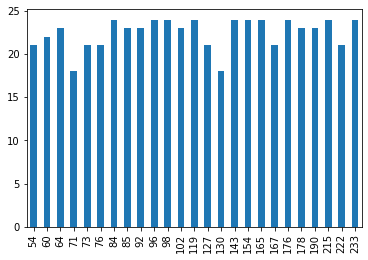

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg['Age_months'].plot(kind = 'bar')


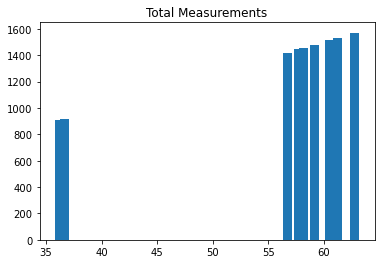

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.xlabel("Drug Regimen")
#plt.ylabel("Total")
plt.title("Total Measurements")
plt.bar(drug_mean, drug_sum)
plt.plot()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
